In [46]:
import osmnx as ox

Получить сразу граф сетей общественного транспорта нельзя. Можно только получить граф-сеть дорог, например, автомобильных, в котором вершины - это перекрёстки или тупики (может быть ещё что-то), а рёбра - дороги.

Для большинства городов, можно просто написать название и будут получены данных со всего города. Но существуют города для которых это не так. Например, чтобы получить всю карту для Санкт-Петербурга, нужно объединить результаты для Санкт-Петербурга, Петергофа, Ломоносова и т.д. Наверное, это особенность городов федерального значения (Москва, Санкт-Петербург, Севастополь).

Далее получена сеть дорого для Петергофа и Ломоносова.

In [47]:
G = ox.graph_from_place(["Петергоф", "Ломоносов"], network_type="drive")

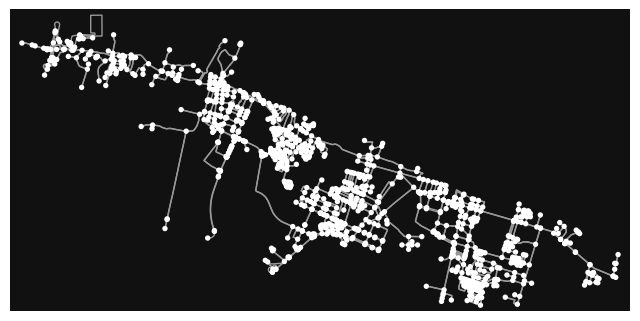

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [48]:
ox.plot_graph(G)

In [49]:
G.nodes

NodeView((237854, 237857, 237858, 237860, 237862, 237866, 237871, 237876, 237877, 237879, 237891, 237893, 237895, 237898, 16808476, 16808510, 16808710, 16808812, 16808856, 16811979, 16812607, 16814517, 16814520, 16815182, 16815993, 16816075, 16816078, 16816091, 16816164, 16816192, 16816287, 16816977, 21684060, 21775595, 21775598, 21775603, 21775626, 21775631, 21775657, 21775661, 21775664, 21775668, 21775671, 21775745, 21775845, 21775988, 21776017, 21776018, 21776064, 21776088, 21776090, 21776129, 21776131, 21776137, 21776141, 21776396, 21776422, 21776534, 21776589, 21776621, 21776623, 21776633, 21776648, 21776649, 21776655, 21776658, 21776755, 21776756, 22478558, 22478636, 22487427, 27483553, 27483602, 27484456, 27484459, 27484461, 27484462, 27484464, 165293291, 169616466, 213371298, 213381568, 213381572, 215330681, 215331070, 215332325, 215332999, 215334393, 215335204, 215335209, 215339855, 215339863, 215339868, 224933982, 233057675, 233061510, 233063046, 233070671, 233070676, 2330710

In [50]:
G.edges

OutMultiEdgeView([(237854, 660851576, 0), (237854, 665592629, 0), (237857, 271447389, 0), (237857, 1516053166, 0), (237857, 1837693918, 0), (237858, 1830487470, 0), (237858, 271447389, 0), (237858, 16808510, 0), (237860, 661165917, 0), (237860, 3488663979, 0), (237862, 665592605, 0), (237862, 665592601, 0), (237862, 237866, 0), (237866, 215339855, 0), (237866, 664500030, 0), (237866, 876413729, 0), (237871, 665833388, 0), (237871, 21776064, 0), (237871, 21776422, 0), (237876, 3874236892, 0), (237876, 237895, 0), (237876, 22478558, 0), (237877, 21776064, 0), (237877, 21775988, 0), (237877, 21776396, 0), (237879, 1890167052, 0), (237879, 271448919, 0), (237891, 1321360038, 0), (237891, 1890167052, 0), (237893, 233063046, 0), (237895, 213381572, 0), (237895, 237876, 0), (237895, 22478636, 0), (237898, 1327852482, 0), (237898, 165293291, 0), (237898, 21776623, 0), (237898, 1837809682, 0), (16808476, 271447421, 0), (16808476, 2305379204, 0), (16808510, 237858, 0), (16808510, 3488663979, 0),

В узлах хранятся координаты.

In [51]:
G.nodes[237854]

{'y': 59.8767234, 'x': 29.8663556, 'street_count': 3}

В ребрах хранится информация о дороге соединяяющей два узла.

In [52]:
G.edges[237854, 660851576, 0]

{'osmid': 52505475,
 'lanes': '2',
 'name': 'Петергофская улица',
 'highway': 'secondary',
 'maxspeed': 'RU:urban',
 'oneway': False,
 'reversed': False,
 'length': 111.904,
 'geometry': <LINESTRING (29.866 59.877, 29.866 59.877, 29.866 59.877, 29.867 59.877, 29....>}

Сам возвращаемый граф является MultiDiGraph из NetworkX: https://networkx.org/documentation/stable/reference/classes/multidigraph.html

Можно вытащить ифнормацию о всех остановках общестщенного транспорта (https://wiki.openstreetmap.org/wiki/RU:Tag:public%20transport=stop%20position?uselang=ru) в определённой области. Например, для Петергофа:

In [53]:
gdf = ox.features.features_from_place("Петергоф", tags={'public_transport': 'stop_position'})

In [54]:
gdf.shape

(183, 14)

В итоге имеем список остановок (координаты остановки, название, id (osmid), тип транспорта).

In [55]:
gdf.head(5)

bus                                       name  \
element_type osmid                                                       
node         16812601   yes                           Луизинская улица   
             16817526   yes                        посёлок Просвещение   
             21775694   yes   железнодорожная станция «Новый Петергоф»   
             233070675  yes  железнодорожная станция «Старый Петергоф»   
             660851541  yes                               Заячий Ремиз   

                       public_transport                   geometry old_name  \
element_type osmid                                                            
node         16812601     stop_position  POINT (29.91837 59.85987)      NaN   
             16817526     stop_position  POINT (29.86300 59.89402)      NaN   
             21775694     stop_position  POINT (29.92676 59.86449)      NaN   
             233070675    stop_position  POINT (29.86397 59.87993)      NaN   
             660851541    stop_position  POINT (29.87985 59.86993)      NaN   

                       alt_name railway train name:de esr:user uic_ref  ref  \
element_type osmid                                                            
node         16812601       NaN     NaN   NaN     NaN      NaN     NaN  NaN   
             16817526       NaN     NaN   NaN     NaN      NaN     NaN  NaN   
             21775694       NaN     NaN   NaN     NaN      NaN     NaN  NaN   
             233070675      NaN     NaN   NaN     NaN      NaN     NaN  NaN   
             660851541      NaN     NaN   NaN     NaN      NaN     NaN  NaN   

                       name:en share_taxi  
element_type osmid                         
node         16812601      NaN        NaN  
             16817526      NaN        NaN  
             21775694      NaN        NaN  
             233070675     NaN        NaN  
             660851541     NaN        NaN

Две остановки, т.к. по одной на одну сторону движения.

In [56]:
gdf[gdf["name"] == "Ректорский проезд"]

bus               name public_transport  \
element_type osmid                                                 
node         1523377167  yes  Ректорский проезд    stop_position   
             1930898526  yes  Ректорский проезд    stop_position   

                                          geometry old_name alt_name railway  \
element_type osmid                                                             
node         1523377167  POINT (29.83063 59.87659)      NaN      NaN     NaN   
             1930898526  POINT (29.83035 59.87673)      NaN      NaN     NaN   

                        train name:de esr:user uic_ref  ref name:en share_taxi  
element_type osmid                                                              
node         1523377167   NaN     NaN      NaN     NaN  NaN     NaN        NaN  
             1930898526   NaN     NaN      NaN     NaN  NaN     NaN        NaN

Получить сам маршрут общественого траспорта через osmnx вроде нельзя, т.к. это отношение. Цитата из документации osmnx: "Retrieve points of interest, building footprints, transit lines/stops, or any other map features from OSM, including their geometries and attribute data, then construct a GeoDataFrame of them. You can use this module to query for nodes, ways, and relations (the latter of type “multipolygon” or “boundary” only) by passing a dictionary of desired OSM tags."